<a href="https://colab.research.google.com/github/sumandutta8877/DATA-Analytics/blob/pankaj/DA_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from GitHub

In [2]:
!git clone 'https://github.com/sumandutta8877/Data_DA.git'    # Run this Line for only one time

Cloning into 'Data_DA'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [3]:
import pandas as pd
df_train = pd.read_csv('/content/Data_DA/Data/Train_data.csv')
df_test = pd.read_csv('/content/Data_DA/Data/Test_data.csv')
df_sample = pd.read_csv('/content/Data_DA/Data/Sample_submission.csv')
#print(df_train.head)
#print(df_test.head)
#print(df_sample.head)
df1 = df_train            # df1 is the training dataframe
df2 = df_test             # df2 is the test dataframe

# Start Processing

In [4]:
print('Hello Suman\'s World!')
print('Load CSV File First')

Hello Suman's World!
Load CSV File First


In [5]:
print(df1.head())

      id  acousticness  danceability  ...  year duration-min  popularity
0   2015         0.949         0.235  ...  1947          3.0    very low
1  15901         0.855         0.456  ...  2020          2.4         low
2   9002         0.827         0.495  ...  1950          2.6    very low
3   6734         0.654         0.643  ...  1974          2.4         low
4  15563         0.738         0.705  ...  1973          3.4     average

[5 rows x 17 columns]


In [6]:
print(df2)

         id  acousticness  danceability  ...  valence  year  duration-min
0      4943       0.03360         0.523  ...    0.346  2014           3.8
1     16165       0.76500         0.687  ...    0.830  1972           3.8
2      6774       0.36300         0.536  ...    0.289  1998           4.4
3      9959       0.00463         0.890  ...    0.970  1980           3.9
4     13818       0.00187         0.555  ...    0.882  2007           3.2
...     ...           ...           ...  ...      ...   ...           ...
3995   6367       0.00019         0.272  ...    0.564  1981           3.5
3996  12061       0.10600         0.444  ...    0.747  2017           3.1
3997  15802       0.64900         0.556  ...    0.604  1994           3.3
3998  11746       0.99500         0.378  ...    0.158  1946           2.6
3999   8441       0.02620         0.534  ...    0.145  2017           3.9

[4000 rows x 16 columns]


In [7]:
df2.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
0,4943,0.03360,0.523,0.861,No,0.000000,0,0.1440,-3.447,Major,01-01-2014,0.0644,127.049,0.346,2014,3.8
1,16165,0.76500,0.687,0.453,No,0.000008,7,0.0897,-11.649,Major,01-04-1972,0.0335,129.987,0.830,1972,3.8
2,6774,0.36300,0.536,0.640,No,0.000000,0,0.0948,-5.862,Major,02-06-1998,0.0368,142.483,0.289,1998,4.4
3,9959,0.00463,0.890,0.617,No,0.003850,2,0.0291,-12.096,Minor,08-09-1980,0.0418,121.126,0.970,1980,3.9
4,13818,0.00187,0.555,0.943,No,0.000042,2,0.1510,-2.492,Major,17-04-2007,0.0891,165.026,0.882,2007,3.2


In [8]:
!pip install pyclustertend

In [9]:
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.preprocessing import scale

## Pre-processing 

In [10]:
labels = dict(zip([1,2,3,4,5],df1['popularity'].unique()))
df1.loc[(df1['popularity']=='very low'), 'popularity level'] = 1
df1.loc[(df1['popularity']=='low'), 'popularity level'] = 2
df1.loc[(df1['popularity']=='average'), 'popularity level'] = 3
df1.loc[(df1['popularity']=='high'), 'popularity level'] = 4
df1.loc[(df1['popularity']=='very high'), 'popularity level'] = 5

In [11]:
import datetime as dt
import time as tm
today = dt.date.today()

# On train data set
df1['loudness'] = (-1)*df1['loudness']

df1['mode'] = df1['mode'].apply(lambda x: 1 if x == 'Major' else 0)
df1['explicit'] = df1['explicit'].apply(lambda x: 1 if x == 'Yes' else 0)

df1['release_date'] = pd.to_datetime(df1['release_date'])
df1['Today']=today
df1['Today']=pd.to_datetime(df1['Today'])
df1['days older']= (df1['Today']-df1['release_date']).dt.days

In [12]:
X = df1.iloc[:,:-4]
X

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,27.398,1,1947-01-01,0.0381,110.838,0.03980,1947,3.0
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,10.046,1,2020-11-13,0.0437,152.066,0.85900,2020,2.4
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,8.009,0,1950-01-01,0.0474,108.004,0.70900,1950,2.6
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,15.917,1,1974-04-30,0.0368,83.636,0.96400,1974,2.4
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,12.344,1,1973-01-01,0.0488,117.260,0.78500,1973,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,5.461,1,2014-01-07,0.4070,81.940,0.74400,2014,3.4
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,14.014,1,1959-01-01,0.0351,134.009,0.70100,1959,2.0
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,9.298,0,1984-01-01,0.0338,124.883,0.89000,1984,2.5
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,26.324,1,2017-09-01,0.1180,73.234,0.00558,2017,3.1


In [13]:
X = scale(X[X.columns[~X.columns.isin(['release_date'])]])
X

array([[-1.29596545,  1.41306319, -1.83247495, ..., -1.88036829,
        -1.44793282, -0.37268969],
       [ 1.66433633,  1.15684715, -0.57224897, ...,  1.29243804,
         1.36941017, -0.62446939],
       [ 0.19356563,  1.08052748, -0.34985615, ...,  0.71147985,
        -1.3321516 , -0.54054282],
       ...,
       [-1.01114886, -0.2795981 , -0.03052287, ...,  1.41250273,
        -0.01996446, -0.58250611],
       [ 0.16734374, -0.84109283, -2.82582955, ..., -2.01290422,
         1.25362895, -0.33072641],
       [ 0.34471455, -1.07005184, -0.95430843, ..., -0.74091563,
         1.36941017, -0.33072641]])

In [14]:
hopkins(X, X.shape[0])

0.18233119290404054

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


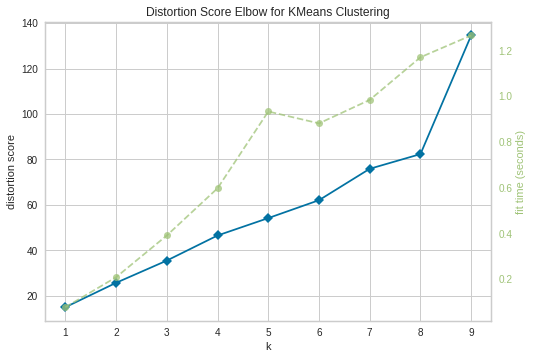

In [15]:
from yellowbrick.cluster import KElbowVisualizer     ## Fuction used to find distortion score with different k-values

model = KMeans()
visualizer = KElbowVisualizer(model,k = (1,10))

visualizer.fit(X)
visualizer.poof();

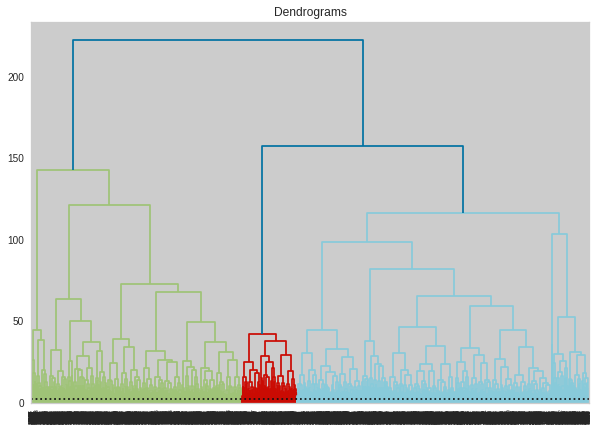

In [17]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=2, color='k', linestyle=':')
plt.show()